In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import random
import nltk

random_seed = 1234
random.seed(random_seed)
plt.rcParams['font.size'] = '12'
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/censored/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
## https://www.kaggle.com/harunshimanto/research-paper
def preProcessing(titles):
    num_titles = titles.size
    clean_titles = []
    stops = set(stopwords.words("english"))
    for i in range( 0, num_titles):
        #letters_only = re.sub("[^a-zA-Z]", " ", titles[i])
        words = titles[i].lower().split()
        words = [w.lower() for w in words if not w in stops]
        clean_titles.append(" ".join(words))
    return clean_titles

data = pd.read_csv("./conferences.data", header=0)
titles, labels = data["Title"],data["Conference"]

processed_titles = preProcessing(titles)

# Count vectorizer:
#   - Strips out “stop words”
#   - Filters out terms that occur in more than half of the docs (max_df=0.5)
#   - Filters out terms that occur in only one document (min_df=2).
#   - Selects the 10,000 most frequently occuring words in the corpus.
#   - Normalizes the vector (L2 norm of 1.0) to normalize the effect of 
#     document length on the tf-idf values. 
vectorizer = CountVectorizer(max_df=0.5, max_features=10000,
							 min_df=2, stop_words='english',
							 )
X = vectorizer.fit_transform(processed_titles)
X = X.todense()

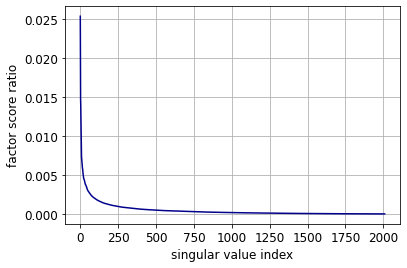

In [3]:
U, E, V = np.linalg.svd(X, full_matrices=False)

E2 = np.array([pow(e,2) for e in E]) # Computing the powers of 2
E3 = E2/np.sum(E2) # Computing the Facttor score ratios

plt.plot(E3, color="darkblue")
plt.grid()
plt.xlabel("singular value index")
plt.ylabel("factor score ratio")
plt.savefig('ResearchPaper_sv_distribution.pdf', bbox_inches='tight')